# Plot of Byte Distribution in Selected Keystream Positions 

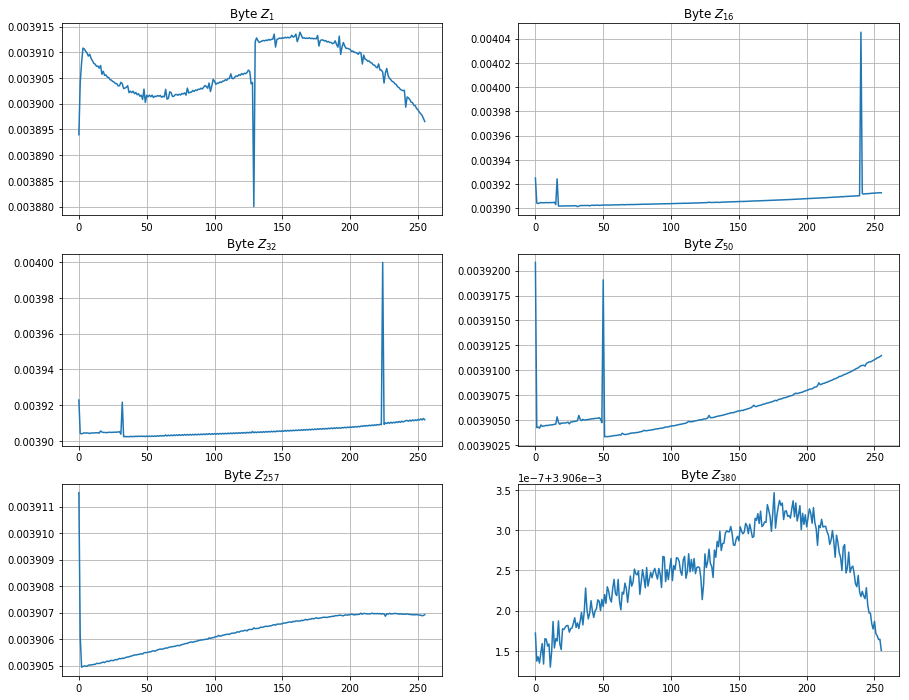

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from calc_success_rate import ByteCnt

prob = ByteCnt.from_file('output/train.txt').prob
plt.figure(figsize=(15, 12))
for idx, pos in enumerate([1, 16, 32, 50, 257, 380]):
    plt.subplot(3, 2, idx + 1)
    plt.plot(np.arange(256), prob[pos - 1])
    plt.grid()
    plt.title('Byte $Z_{{{}}}$'.format(pos))
plt.show()

# Plot of Matching Success Rate

Distribution matching methods:

1. *MLE*: maximum likelihood estimator as in the paper
2. *L2*: minimum L2 distance: it makes sense if all positions are assumed to obey independent normal distributions
3. *KL*: minimum KL-divergence

In [2]:
import pickle
import collections
with open('output/result.pkl', 'rb') as fin:
    orig_result = pickle.load(fin)
result = {}
for method, records in orig_result.items():
    sample2succ = collections.defaultdict(list)
    for samples, succ in records:
        sample2succ[samples].append(succ)
    for k, v in list(sample2succ.items()):
        v = np.ascontiguousarray(v)
        sample2succ[k] = (np.mean(v, axis=0), np.std(v, axis=0))
    result[method] = sample2succ
sample_points = np.ascontiguousarray(sorted(next(iter(result.values())).keys()))
print('all sample points:', sample_points)
sample_points = sample_points[[0, 3, 6, -1]]
print('used sample points:', sample_points)

all sample points: [  24084480   48168960   96337920  192675840  385351680  770703360
 1541406720 3082813440 4311121920]
used sample points: [  24084480  192675840 1541406720 4311121920]


In [3]:
def make_plot(stat_type=0, size=None, relative=False):
    plt.figure(figsize=(15, 12))
    for plot_idx, samples in enumerate(sample_points):
        plt.subplot(2, 2, plot_idx + 1)
        plt.title('$2^{{{:.2f}}}$ samples'.format(np.log2(samples)))
        for meth_idx, method in enumerate(sorted(result.keys())):
            val = result[method][samples][stat_type]
            if relative:
                if method == 'MLE':
                    break
                val = val - result['MLE'][samples][stat_type]
            if size is not None:
                val = val[:size]
            xv = np.arange(val.size)
            ax = plt.plot(xv, val, label=method + '-MLE')
        plt.legend(loc='best')
    return plt.show()

# Plot of Mean

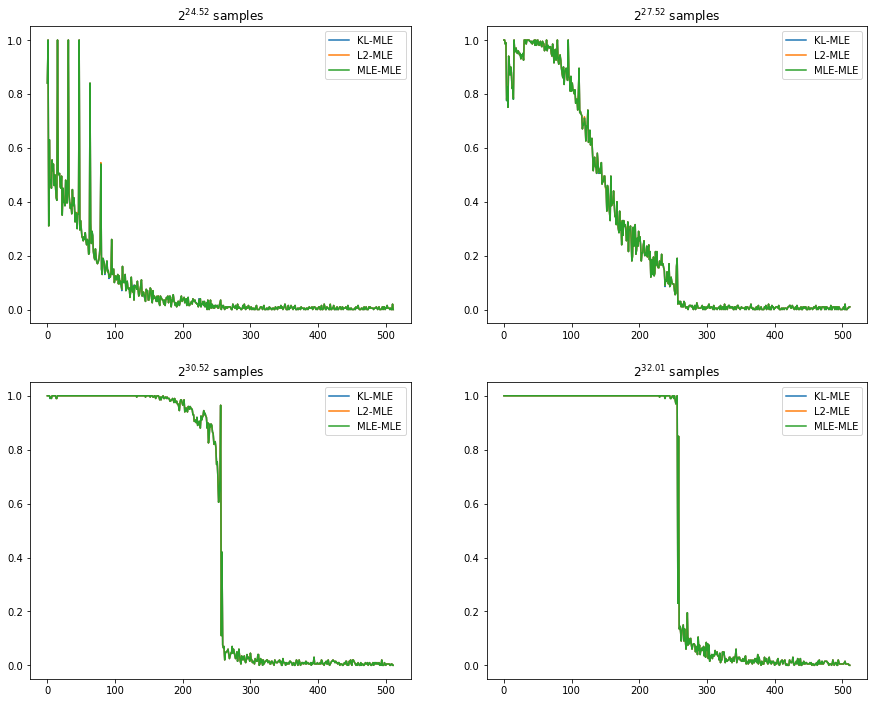

In [4]:
make_plot()

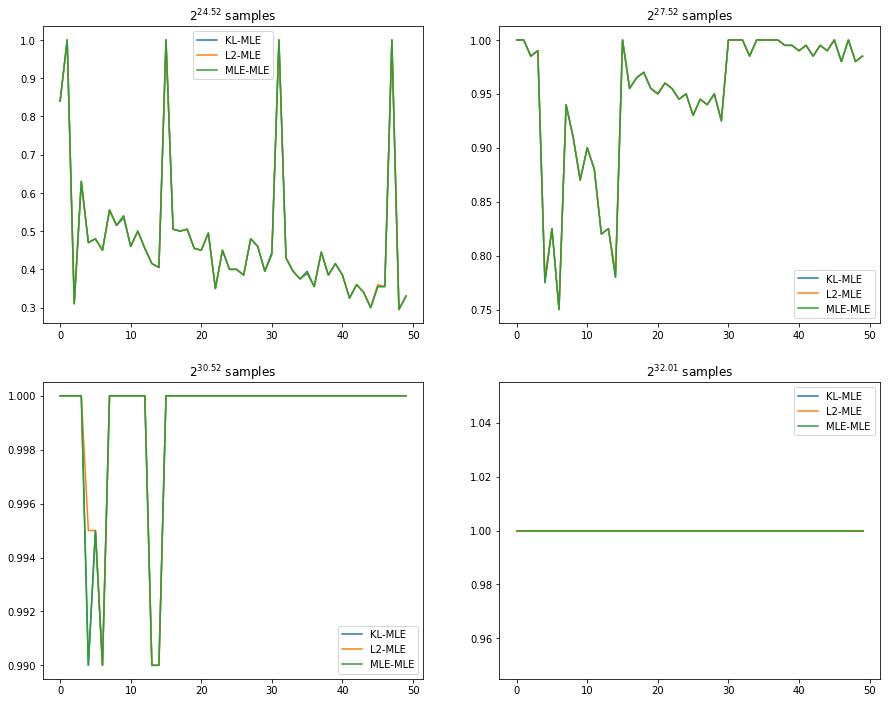

In [5]:
make_plot(size=50)

## Plot of Std

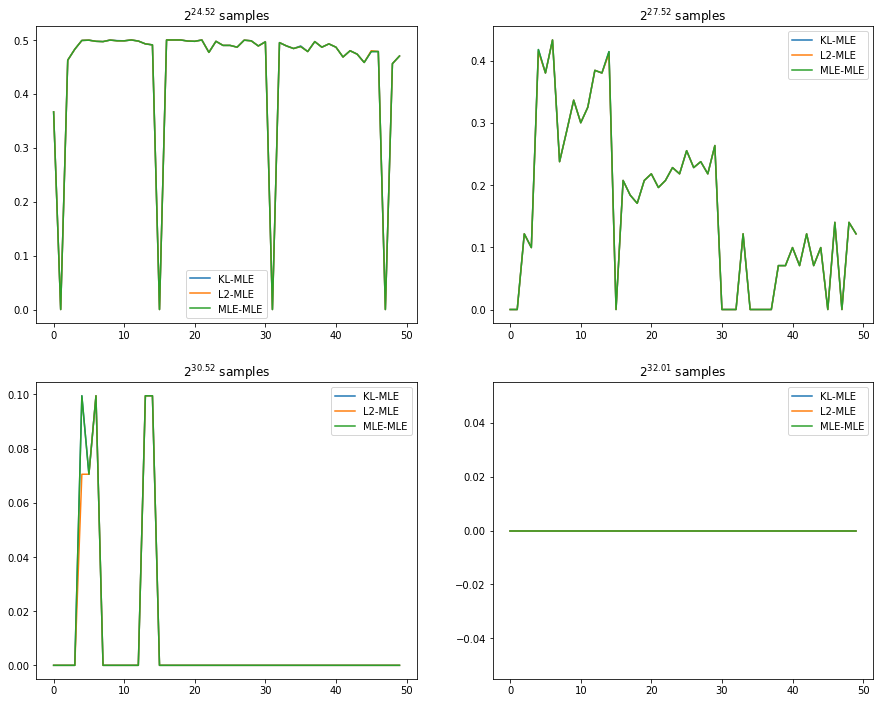

In [6]:
make_plot(size=50, stat_type=1)

## Any Difference Between Methods ? Negligible

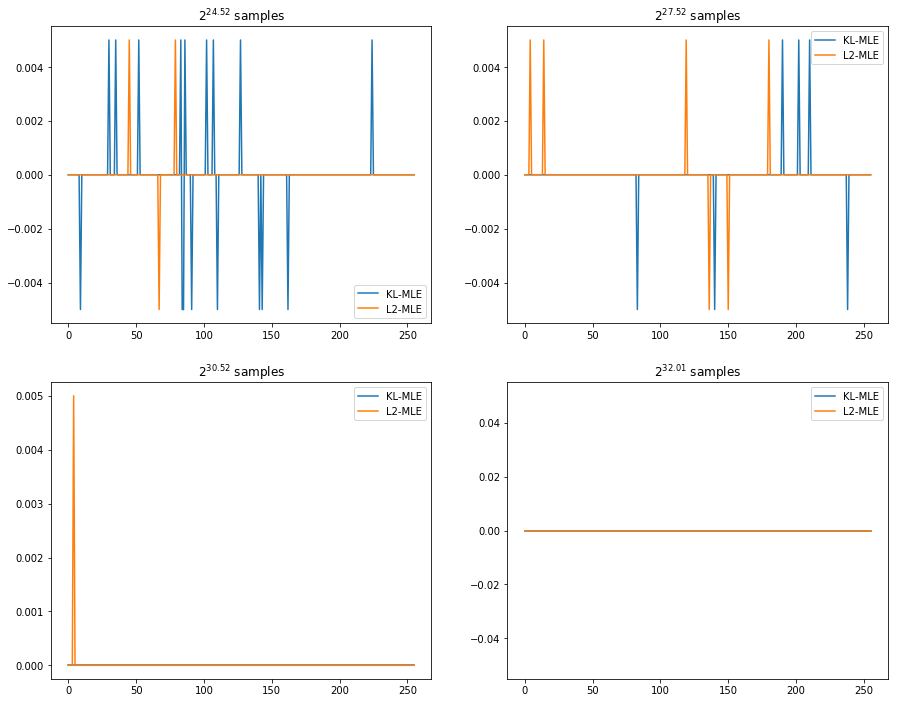

In [7]:
make_plot(size=256, relative=True)